In [1]:
import numpy as np
import pandas as pd
df=pd.read_csv("C:\\Users\\HP EliteBook 850 G3\\Desktop\\COUR S2\\machainne_learning\\data_set\\petrol_consumption.csv")
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [2]:
df.dtypes

Petrol_tax                      float64
Average_income                    int64
Paved_Highways                    int64
Population_Driver_licence(%)    float64
Petrol_Consumption                int64
dtype: object

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Petrol_tax                    48 non-null     float64
 1   Average_income                48 non-null     int64  
 2   Paved_Highways                48 non-null     int64  
 3   Population_Driver_licence(%)  48 non-null     float64
 4   Petrol_Consumption            48 non-null     int64  
dtypes: float64(2), int64(3)
memory usage: 2.0 KB


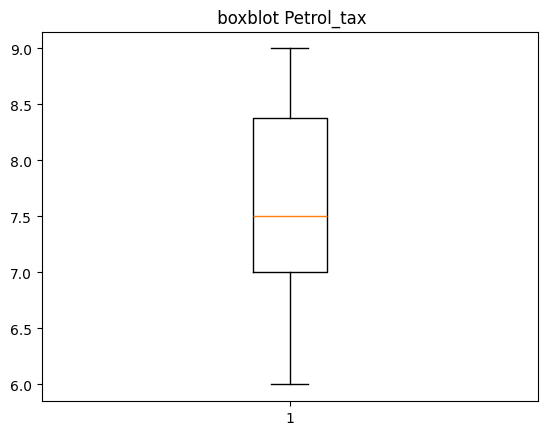

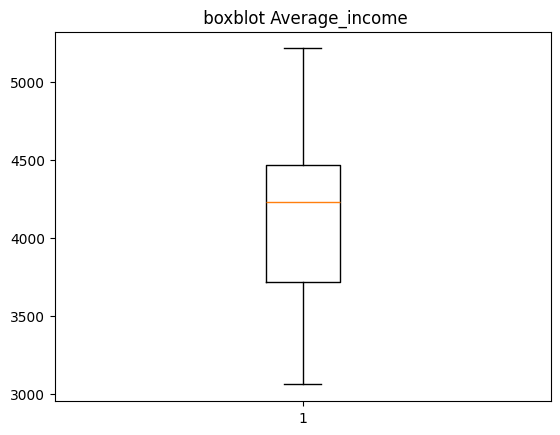

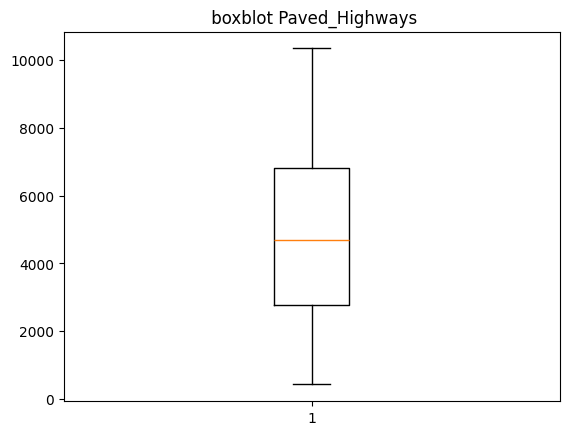

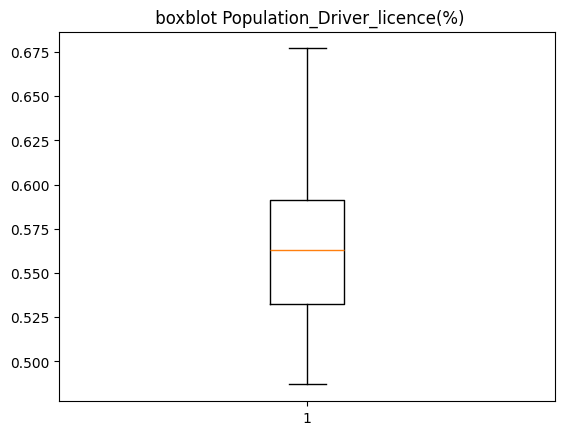

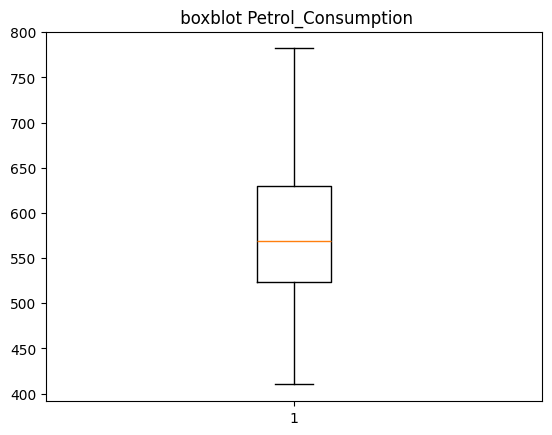

In [16]:
import matplotlib.pyplot as plt
for column in df.columns:
   plt.boxplot(df[column])
   plt.title(f" boxblot {column}")
   plt.show()

In [5]:


for column in df.columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


<p Style="font-size:30px">Correlation among the different columns</p>


Text(0.5, 1.0, 'matrice de corelation')

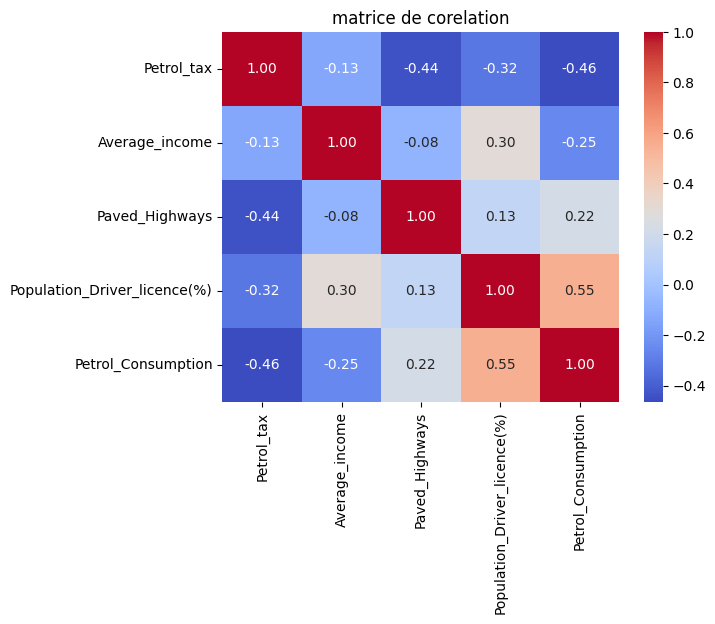

In [28]:
sns.heatmap(df.corr(),annot=True,cmap="coolwarm",fmt='.2f')
plt.title("matrice de corelation")

In [31]:
predictor_var=df[['Petrol_tax','Average_income','Paved_Highways','Population_Driver_licence(%)']] 
target_var= df['Petrol_Consumption'] 

In [32]:
predictor_var.shape

(42, 4)

In [34]:
target_var.shape

(42,)

<p Style="font-size:30px">Correlation among the different columns</p>


In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(predictor_var,target_var,test_size=0.30,random_state=123)

In [49]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(max_depth=4,max_features=4,criterion='squared_error')
tree.fit(X_train, Y_train)


DecisionTreeRegressor(max_depth=4, max_features=4)

In [50]:
predictions = tree.predict(X_test)


In [51]:
df=pd.DataFrame({'Actual':Y_test, 'Predicted':predictions})
df.head(5)

,Actual,Predicted
31,554,673.666667
15,635,673.666667
14,566,632.000000
41,699,609.500000
13,508,673.666667


In [56]:
from sklearn.tree import export_graphviz
df = pd.DataFrame({'Valeur réelle': Y_test, 'Valeur prédite': predictions})
print(df.head())


    Valeur réelle  Valeur prédite
31            554      673.666667
15            635      673.666667
14            566      632.000000
41            699      609.500000
13            508      673.666667


In [ ]:
import tkinter as tk
from tkinter import messagebox
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

def train_model():
    # Load dataset (Replace with actual dataset path if needed)
    data = pd.read_csv("petrol_consumption.csv")
    
    # Define predictor variables and target variable
    predictor_var = data[['Petrol_tax', 'Average_income', 'Paved_Highways', 'Population_Driver_licence(%)']]
    target_var = data['Petrol_Consumption']
    
    # Split dataset
    X_train, X_test, Y_train, Y_test = train_test_split(predictor_var, target_var, test_size=0.3, random_state=123)
    
    # Train decision tree model
    global model
    model = DecisionTreeRegressor(max_depth=4, max_features=4, criterion='mse')
    model.fit(X_train, Y_train)
    
    messagebox.showinfo("Model Training", "The Decision Tree Model has been trained successfully!")

def predict_consumption():
    try:
        values = [
            float(entry_petrol_tax.get()),
            float(entry_avg_income.get()),
            float(entry_paved_highways.get()),
            float(entry_population_dl.get())
        ]
        prediction = model.predict([values])[0]
        result_label.config(text=f"Predicted Petrol Consumption: {prediction:.2f}")
    except Exception as e:
        messagebox.showerror("Input Error", f"Invalid input: {str(e)}")

# Create GUI window
root = tk.Tk()
root.title("Petrol Consumption Prediction")
root.geometry("400x300")

# Labels and Entry fields
tk.Label(root, text="Petrol Tax").pack()
entry_petrol_tax = tk.Entry(root)
entry_petrol_tax.pack()

tk.Label(root, text="Average Income").pack()
entry_avg_income = tk.Entry(root)
entry_avg_income.pack()

tk.Label(root, text="Paved Highways").pack()
entry_paved_highways = tk.Entry(root)
entry_paved_highways.pack()

tk.Label(root, text="Population with Driver License (%)").pack()
entry_population_dl = tk.Entry(root)
entry_population_dl.pack()

# Buttons
train_button = tk.Button(root, text="Train Model", command=train_model)
train_button.pack()

predict_button = tk.Button(root, text="Predict", command=predict_consumption)
predict_button.pack()

# Prediction Result
result_label = tk.Label(root, text="Prediction Result: ", font=("Arial", 12))
result_label.pack()

# Run the GUI
root.mainloop()
